In [3]:
setwd('/import/hd//sc')

In [2]:
getwd()

[1] "/import/hd/sc"

In [3]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [18]:
immune.combined = readRDS('./Macrophage.rds')

In [ ]:
dim(as.matrix(immune.combined@assays$RNA@counts))
Idents(immune.combined) = 'orig.ident'
immune.combined = subset(immune.combined,idents = c( 'sn_OA_1',  'sn_OA_2' ,'sn_healthy_1' ),invert =TRUE)
mca2=CreateSeuratObject(immune.combined@assays$RNA@data,assay = "RNA",min.cells = 10,meta.data = immune.combined@meta.data)
immune.combined = mca2
immune.combined

In [ ]:
# ifnb.list <- SplitObject(immune.combined, split.by = "orig.ident")
# testAB.anchors <- FindIntegrationAnchors(object.list = ifnb.list, dims = 1:20)
# testAB.integrated <- IntegrateData(anchorset = testAB.anchors, dims = 1:20)
# DefaultAssay(testAB.integrated) <- "integrated"
# # Run the standard workflow for visualization and clustering
# testAB.integrated <- ScaleData(testAB.integrated, features = rownames(testAB.integrated))
# testAB.integrated <- RunPCA(testAB.integrated, npcs = 20, verbose = FALSE)
# testAB.integrated <- FindNeighbors(testAB.integrated, dims = 1:20)
# testAB.integrated <- FindClusters(testAB.integrated, resolution = 0.3)
# testAB.integrated <- RunUMAP(testAB.integrated, dims = 1:20)
# testAB.integrated <- RunTSNE(testAB.integrated, dims = 1:20)
# immune.combined = testAB.integrated

Computing 2000 integration features

No variable features found for object1 in the object.list. Running FindVariableFeatures ...

No variable features found for object2 in the object.list. Running FindVariableFeatures ...

No variable features found for object3 in the object.list. Running FindVariableFeatures ...

No variable features found for object4 in the object.list. Running FindVariableFeatures ...

No variable features found for object5 in the object.list. Running FindVariableFeatures ...

No variable features found for object6 in the object.list. Running FindVariableFeatures ...

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2866 anchors

Filtering anchors

	Retained 2435 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5105 anchors

Filtering anchors

	Retained 3665 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

In [66]:
scRNAlist =  SplitObject(immune.combined, split.by = "orig.ident")
scRNA_harmony <- merge(scRNAlist[[1]], y=scRNAlist[2:length(scRNAlist)])
DefaultAssay(scRNA_harmony) = 'RNA'
library(harmony)
scRNA_harmony <- NormalizeData(scRNA_harmony) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose=FALSE)
##整合
system.time({scRNA_harmony <- RunHarmony(scRNA_harmony, group.by.vars = "orig.ident")})
scRNA_harmony <- RunUMAP(scRNA_harmony, reduction = "harmony", dims = 1:20)
scRNA_harmony <- RunTSNE(scRNA_harmony, reduction = "harmony", dims = 1:20)
scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:20) %>% FindClusters(resolution =  0.1)
##作图
#group_by_cluster
plot1 = DimPlot(scRNA_harmony, reduction = "umap", label=T) 

Centering and scaling data matrix

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony converged after 4 iterations

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity"


   user  system elapsed 
  6.504   4.554   5.017 

14:38:59 UMAP embedding parameters a = 0.9922 b = 1.112

14:38:59 Read 10225 rows and found 20 numeric columns

14:38:59 Using Annoy for neighbor search, n_neighbors = 30

14:38:59 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:39:00 Writing NN index file to temp file /tmp/RtmpBTotF8/file34f2333a43f4d

14:39:00 Searching Annoy index using 1 thread, search_k = 3000

14:39:03 Annoy recall = 100%

14:39:03 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:39:04 Initializing from normalized Laplacian + noise (using irlba)

14:39:05 Commencing optimization for 200 epochs, with 445324 positive edges

14:39:16 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10225
Number of edges: 397861

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9555
Number of communities: 8
Elapsed time: 2 seconds


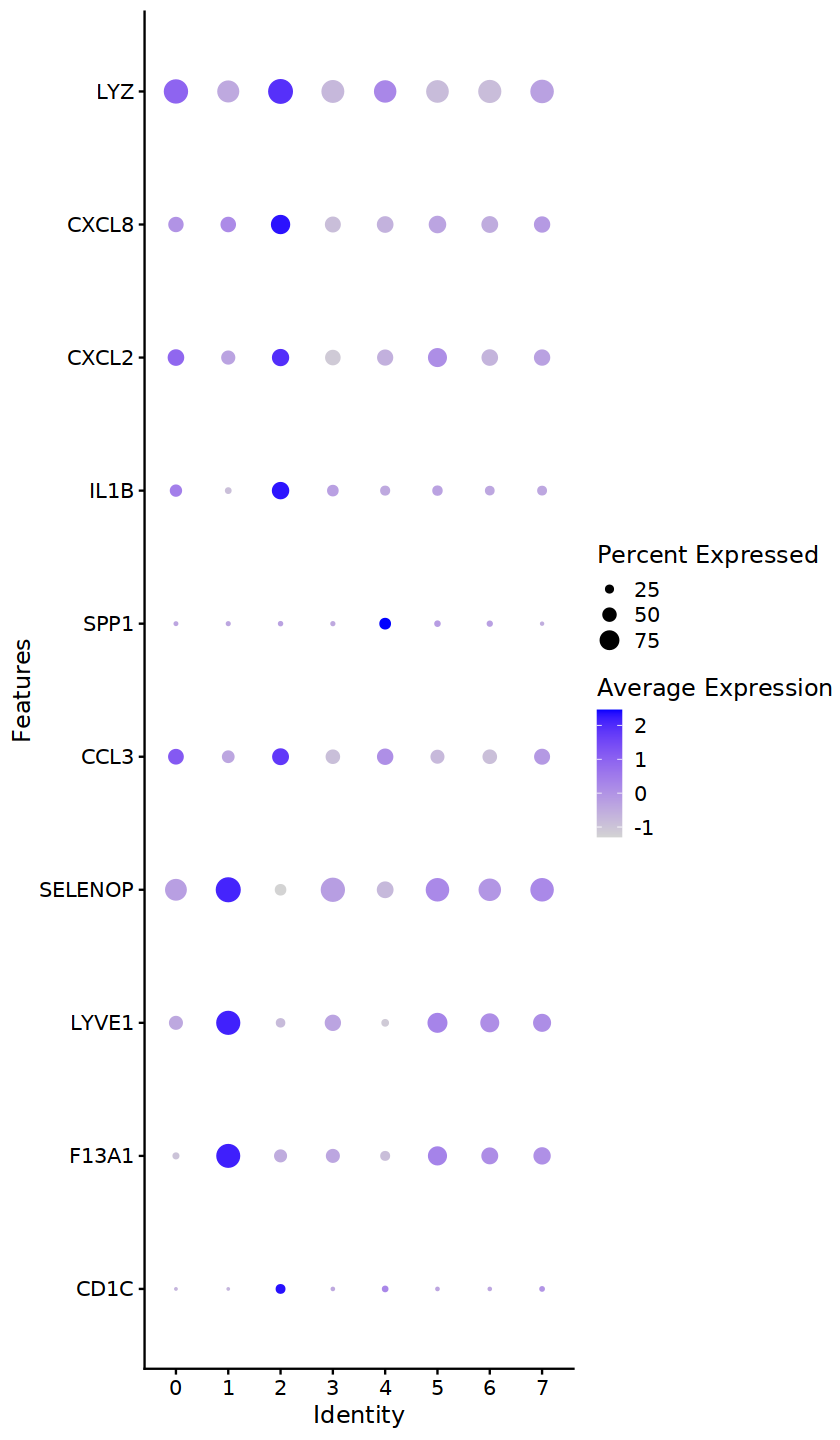

In [111]:
DotPlot(scRNA_harmony,features = c('CD1C','F13A1','LYVE1','SELENOP','CCL3','SPP1','IL1B','CXCL2','CXCL8','LYZ'))+coord_flip()

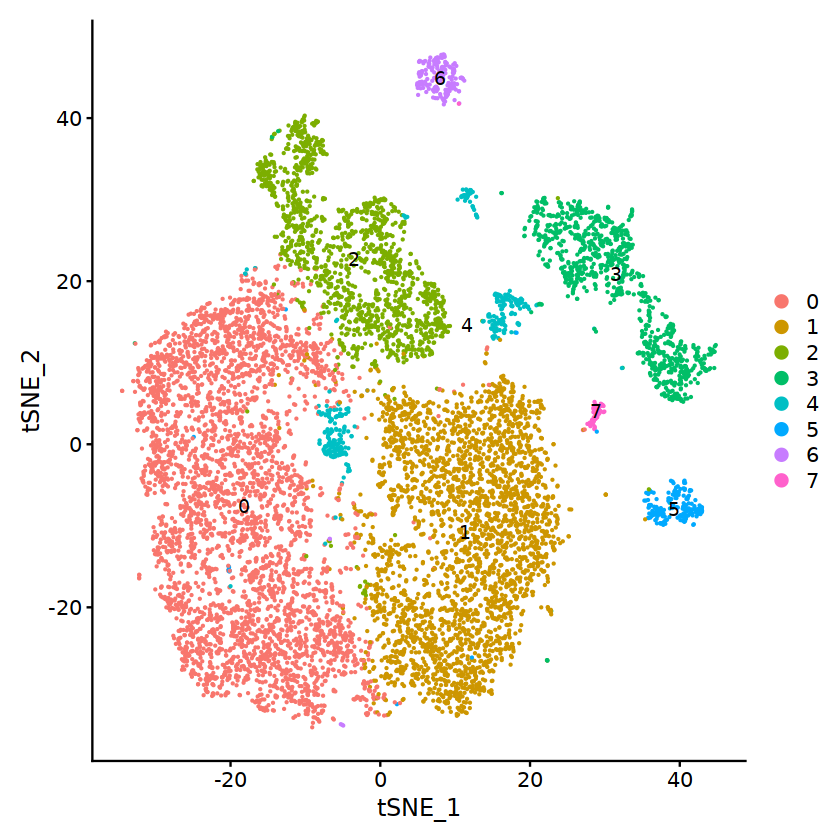

In [68]:
DimPlot(scRNA_harmony, reduction = "tsne", label=T) 

In [112]:
test.seu = scRNA_harmony

In [113]:
s.genes=Seurat::cc.genes.updated.2019$s.genes
g2m.genes=Seurat::cc.genes.updated.2019$g2m.genes
test.seu <- CellCycleScoring(test.seu, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)

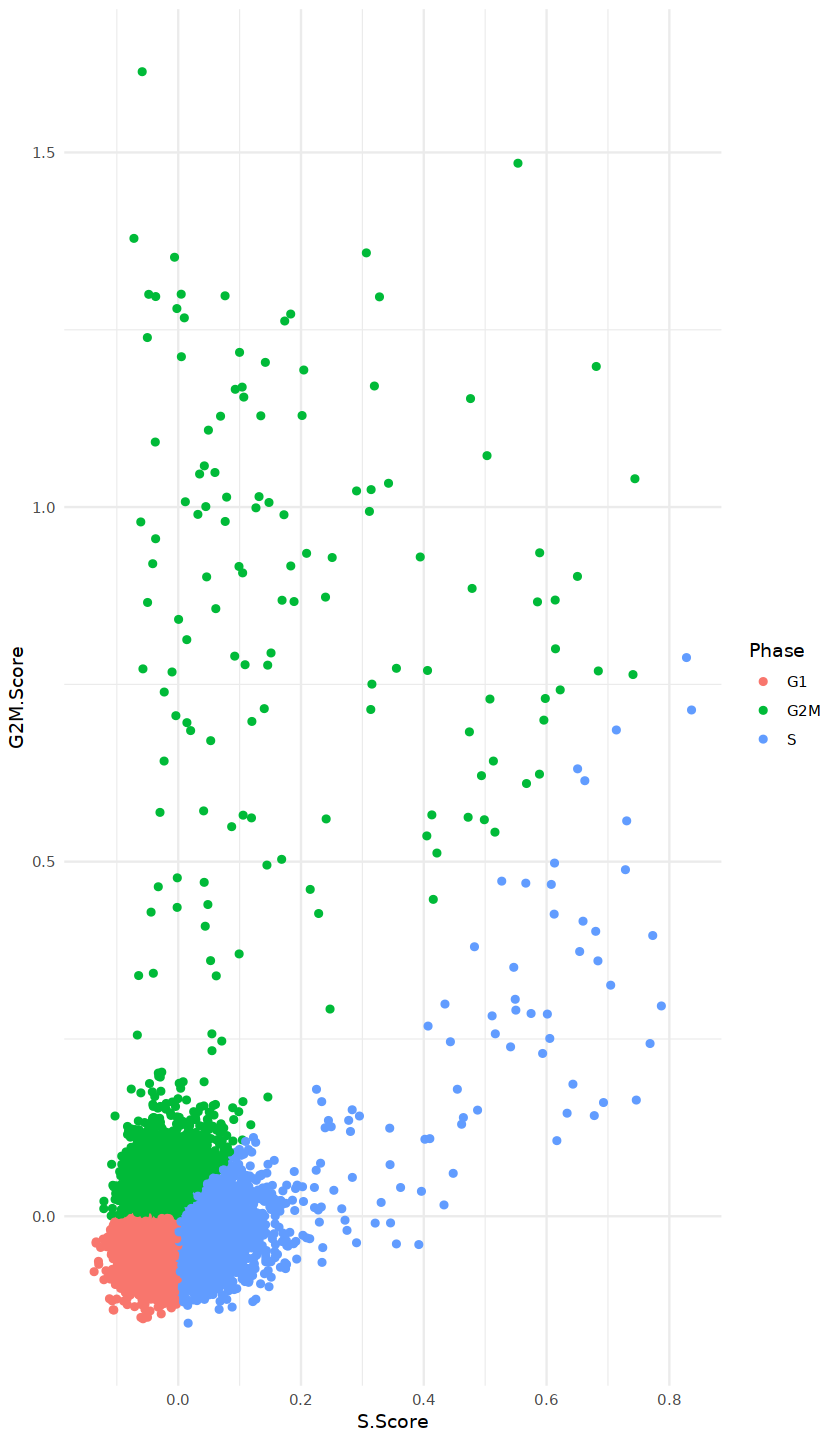

In [114]:
test.seu@meta.data  %>% ggplot(aes(S.Score,G2M.Score))+geom_point(aes(color=Phase))+
    theme_minimal()

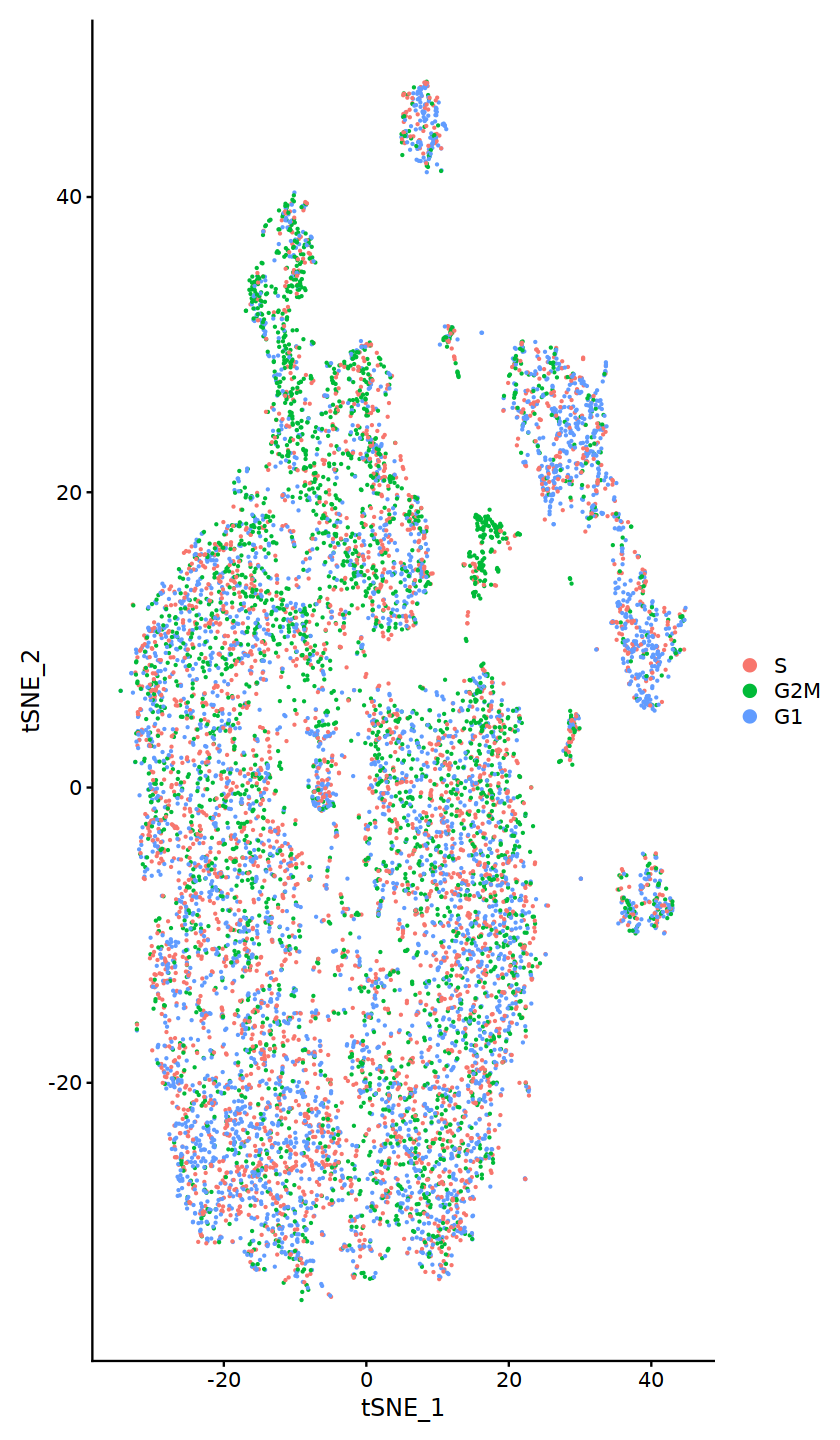

In [116]:
DimPlot(test.seu,reduction = "tsne")

In [117]:
immune.combined = test.seu

In [118]:
scRNAlist =  SplitObject(immune.combined, split.by = "orig.ident")
scRNA_harmony <- merge(scRNAlist[[1]], y=scRNAlist[2:length(scRNAlist)])
DefaultAssay(scRNA_harmony) = 'RNA'
library(harmony)
scRNA_harmony <- NormalizeData(scRNA_harmony) %>% FindVariableFeatures() %>% ScaleData(vars.to.regress = c("S.Score", "G2M.Score"),
                                                                                       features = rownames(.)) %>% RunPCA(verbose=FALSE)
##整合
system.time({scRNA_harmony <- RunHarmony(scRNA_harmony, group.by.vars = "orig.ident")})
scRNA_harmony <- RunUMAP(scRNA_harmony, reduction = "harmony", dims = 1:20)
scRNA_harmony <- RunTSNE(scRNA_harmony, reduction = "harmony", dims = 1:20)
scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:20) %>% FindClusters(resolution =  0.1)
##作图
#group_by_cluster


Regressing out S.Score, G2M.Score

Centering and scaling data matrix

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony converged after 4 iterations

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity"


   user  system elapsed 
 16.352  12.887   5.412 

06:45:27 UMAP embedding parameters a = 0.9922 b = 1.112

06:45:27 Read 10225 rows and found 20 numeric columns

06:45:27 Using Annoy for neighbor search, n_neighbors = 30

06:45:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

06:45:28 Writing NN index file to temp file /tmp/RtmpBTotF8/file34f231329b548

06:45:28 Searching Annoy index using 1 thread, search_k = 3000

06:45:30 Annoy recall = 100%

06:45:31 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

06:45:33 Initializing from normalized Laplacian + noise (using irlba)

06:45:33 Commencing optimization for 200 epochs, with 443530 positive edges

06:45:45 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10225
Number of edges: 388568

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9542
Number of communities: 10
Elapsed time: 2 seconds


In [131]:
Idents(scRNA_harmony) = 'seurat_clusters'

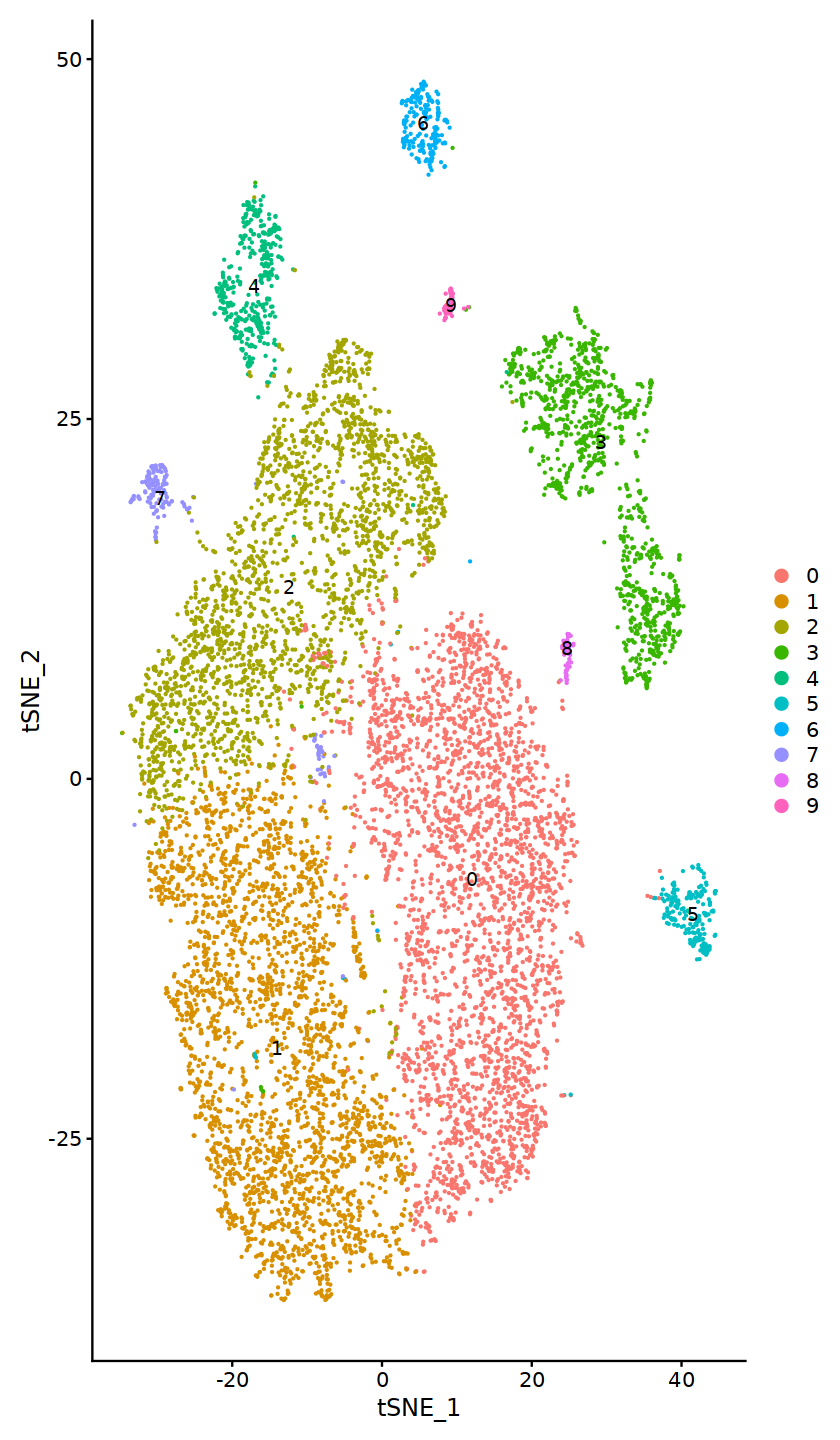

In [133]:
DimPlot(scRNA_harmony, reduction = "tsne",label = T) 

In [134]:
Idents(scRNA_harmony) = 'seurat_clusters'

In [135]:
scRNA_harmony = subset(scRNA_harmony,idents = c(0,1,2,4,7,9))

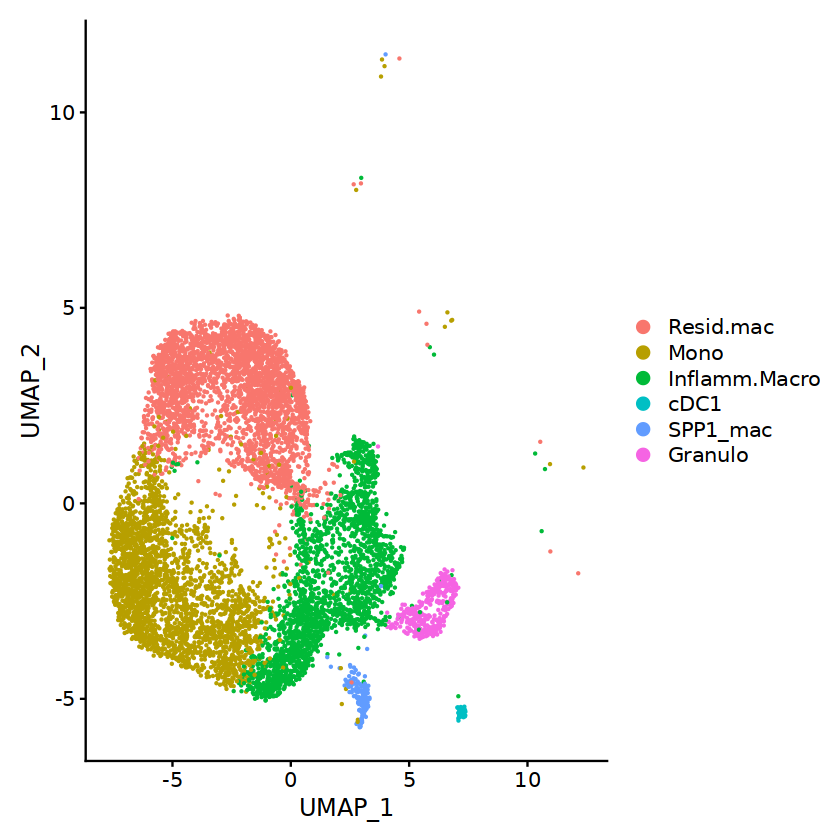

In [198]:
DimPlot(scRNA)

In [142]:
getwd()

[1] "/import/hd/sc"

In [143]:
scRNA = scRNA_harmony

library(Seurat) ##
library(SingleR)
library(ggplot2)
library(reshape2)
mouseImmu  = get(load('/import/DB/SingleR_ref/ref_Human_all.RData'))

pbmc_for_SingleR <- GetAssayData(scRNA, slot="data") ##获取标准化矩阵
clusters=scRNA@meta.data$seurat_clusters

pred.mouseImmu <- SingleR(test = pbmc_for_SingleR, ref = mouseImmu, labels = mouseImmu$label.main,
 method = "cluster", clusters = clusters, 
 assay.type.test = "logcounts", assay.type.ref = "logcounts")
celltype = data.frame(ClusterID=rownames(pred.mouseImmu), celltype=pred.mouseImmu$labels, stringsAsFactors = FALSE)

Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames =

In [144]:
celltype$celltype = c('Resid.mac','Mono','Inflamm.Macro','Granulo','SPP1_mac','cDC1')

In [ ]:
# 0   Resid.mac
# 1 Mono
# 2 Inflamm.mac
# 7 SPP1_mac
# 9 cDC1
# 4 Granulo

# 3 5 6 8 others

In [145]:


scRNA@meta.data$celltype = "NA"
# 赋值
for(i in 1:nrow(celltype)){
  scRNA@meta.data[which(scRNA@meta.data$seurat_clusters == celltype$ClusterID[i]),'celltype'] <- celltype$celltype[i]}

In [191]:
Idents(scRNA) = 'celltype'

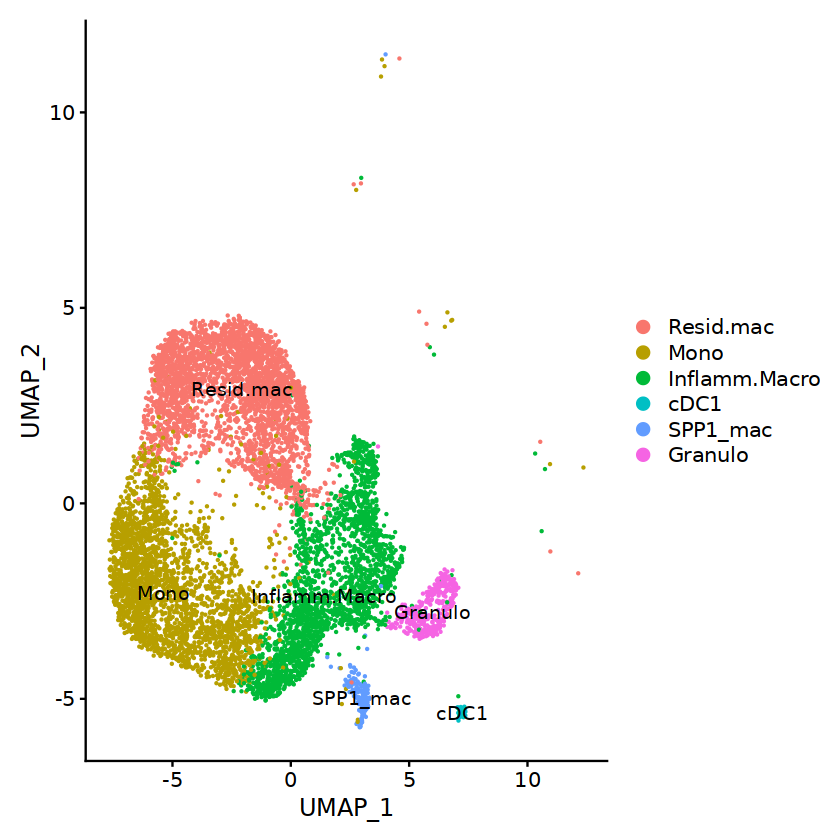

In [192]:
DimPlot(scRNA,label = TRUE)

In [193]:
ggsave(file = '../figure/fig.marco.umap.pdf',width = 7,height = 5)

In [149]:
saveRDS(scRNA,file= 'scRNA.macro.rds')

In [4]:
scRNA = readRDS('./scRNA.macro.rds')

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [6]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
Attaching SeuratObject



In [7]:
Idents(scRNA) = 'celltype'
DefaultAssay(scRNA) = 'RNA'
sce.markers <- FindAllMarkers(object = scRNA, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
 

# library(dplyr) 
# # 不同seurat版本的 avg_logFC 不一样 
# top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)

library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)



Calculating cluster Resid.mac

Calculating cluster Mono

Calculating cluster Inflamm.Macro

Calculating cluster cDC1

Calculating cluster SPP1_mac

Calculating cluster Granulo


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




ERROR: Error in coord_flip(): could not find function "coord_flip"


In [8]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


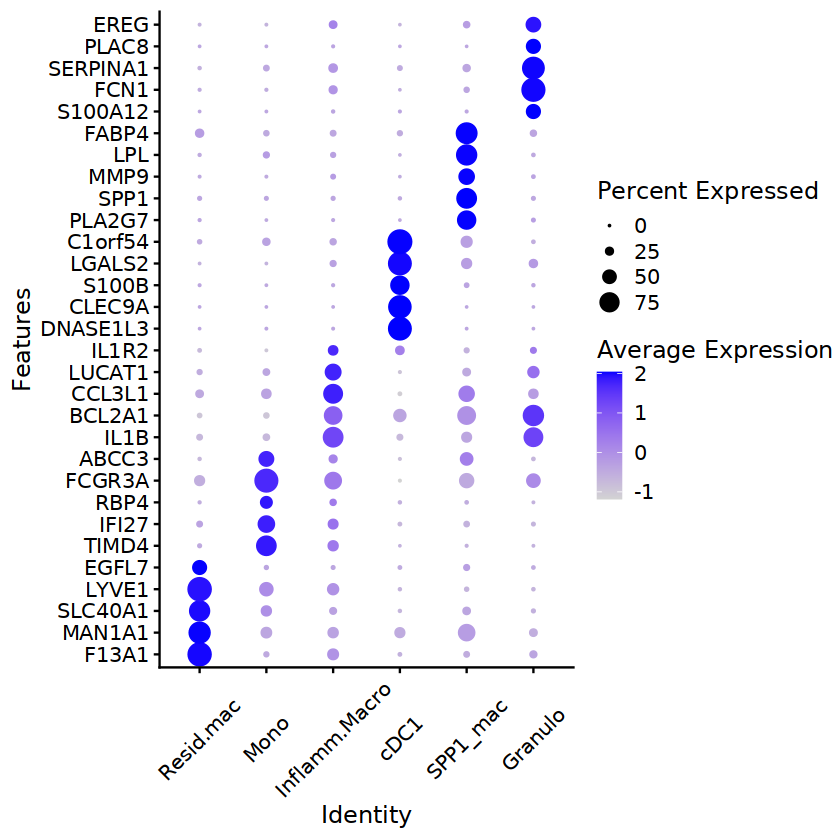

In [9]:
options(repr.plot.height = 7,repr.plot.width = 7)

 DotPlot(scRNA, features = unique(top5$gene) ,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

ggsave(file = '../figure/fig.macro.marker.doc.pdf',width = 6,height = 9)

write.csv(sce.markers,file = 'macro.sce.marker.csv')

In [ ]:
# spp1 = scRNA_harmony@meta.data %>%  dplyr::filter(seurat_clusters == 8) %>%  rownames()
# saveRDS(spp1,file= 'spp1.rds')

### slingshot

In [10]:
library(slingshot)
library(Seurat)
library(devtools)
library(cowplot)
library(ggplot2)
library(Matrix)
library(dplyr)
library(tradeSeq)
library(RColorBrewer)
library(DelayedMatrixStats)
library(scales)
library(paletteer) 
library(viridis)

Loading required package: princurve

Loading required package: TrajectoryUtils

Loading required package: SingleCellExperiment

Warning message:
"package 'SingleCellExperiment' was built under R version 4.2.2"
Loading required package: SummarizedExperiment

Warning message:
"package 'SummarizedExperiment' was built under R version 4.2.2"
Loading required package: MatrixGenerics

Loading required package: matrixStats

Warning message:
"package 'matrixStats' was built under R version 4.2.3"

Attaching package: 'matrixStats'


The following object is masked from 'package:dplyr':

    count



Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, col

In [11]:
table(scRNA$group)


Healthy      OA 
   4689    4037 

In [12]:
Idents(scRNA) = 'group'

In [13]:
OAA = subset(scRNA,idents = 'OA')

In [14]:
Idents(OAA) = 'celltype'

In [15]:
table(OAA$celltype)


      Granulo Inflamm.Macro          Mono     Resid.mac      SPP1_mac 
           67          1375          1677           833            51 
         cDC1 
           34 

In [16]:
sce <- as.SingleCellExperiment(OAA, assay = "RNA")

In [17]:
sce_slingshot1 <- slingshot(sce,      #输入单细胞对象
                     reducedDim = 'UMAP',  #降维方式
                     clusterLabels = sce$celltype,  #cell类型
                     start.clus = 'Mono',       #轨迹起点,也可以不定义
                     approx_points = 150)

Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."


In [18]:
SlingshotDataSet(sce_slingshot1) 

class: SlingshotDataSet 

 Samples Dimensions
    4037          2

lineages: 3 
Lineage1: Mono  Inflamm.Macro  Granulo  cDC1  
Lineage2: Mono  Inflamm.Macro  SPP1_mac  
Lineage3: Mono  Resid.mac  

curves: 3 
Curve1: Length: 17.707	Samples: 2791.44
Curve2: Length: 21.292	Samples: 2648.44
Curve3: Length: 22.871	Samples: 1659.2

In [19]:
cell_pal <- function(cell_vars, pal_fun,...) {
  if (is.numeric(cell_vars)) {
    pal <- pal_fun(100, ...)
    return(pal[cut(cell_vars, breaks = 100)])
  } else {
    categories <- sort(unique(cell_vars))
    pal <- setNames(pal_fun(length(categories), ...), categories)
    return(pal[cell_vars])
  }
}

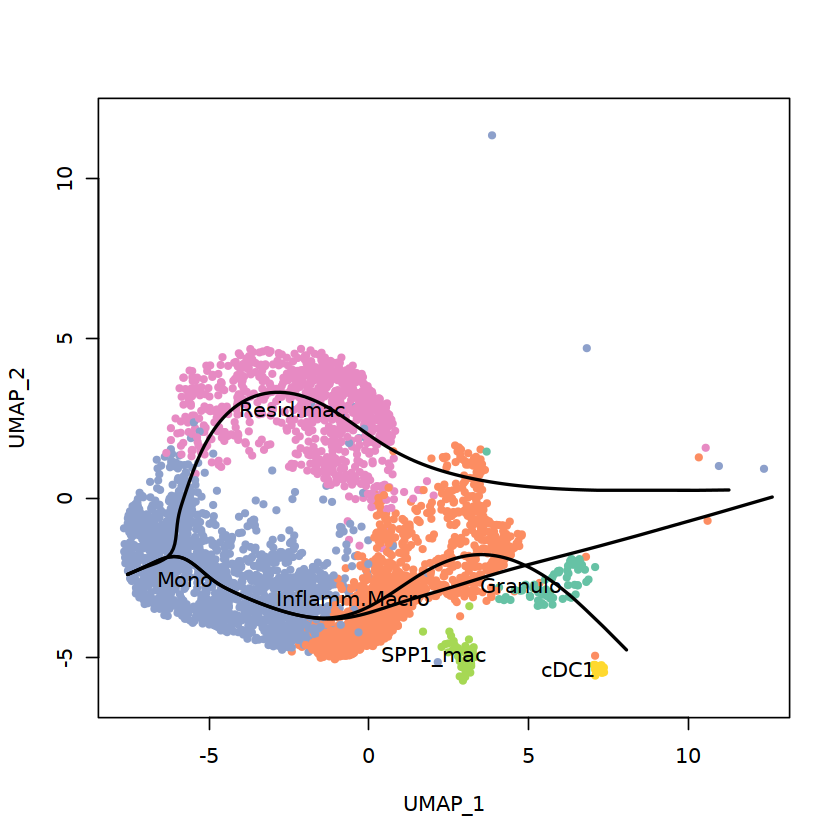

In [21]:
cell_colors <- cell_pal(sce_slingshot1$celltype, brewer_pal("qual", "Set2"))
plot(reducedDims(sce_slingshot1)$UMAP, col = cell_colors, pch=16, asp = 1, cex = 0.8)
lines(SlingshotDataSet(sce_slingshot1), lwd=2, col='black')

celltype_label <- OAA@reductions$umap@cell.embeddings%>% 
  as.data.frame() %>%
  cbind(celltype = OAA@meta.data$celltype) %>%
  group_by(celltype) %>%
  summarise(UMAP1 = median(UMAP_1),
            UMAP2 = median(UMAP_2))

for (i in 1:8) {
  text(celltype_label$celltype[i], x=celltype_label$UMAP1[i]-1, y=celltype_label$UMAP2[i])
}

In [22]:
ggsave(file = '../figure/fig.macro.slingshot.umap.pdf',width = 6,height = 5)

### cellcaht

In [32]:
table(scRNA$group)


Healthy      OA 
   4689    4037 

In [33]:
library(CellChat)
library(patchwork)

In [34]:
Idents(scRNA) = 'group'

In [35]:
sce1 = scRNA

In [36]:
Idents(sce1) = 'group'
wt = subset(sce1,idents = 'Healthy')
ko = subset(sce1,idents = 'OA')

In [37]:
cellchat <- createCellChat(object = ko,
                           meta = ko@meta.data,
                           group.by = "celltype")
cellchat

CellChatDB <- CellChatDB.human
CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling") 
# set the used database in the object
cellchat@DB <- CellChatDB.use

library(future)
cellchat <- subsetData(cellchat) 
# do parallel ，根据配置设置
plan(multisession, workers=20)
cellchat <- identifyOverExpressedGenes(cellchat)
#识别过表达配体受体对
cellchat <- identifyOverExpressedInteractions(cellchat)

[1] "Create a CellChat object from a Seurat object"
The `data` slot in the default assay is used. The default assay is RNA 


Warning message in createCellChat(object = ko, meta = ko@meta.data, group.by = "celltype"):
"The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
"


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Granulo, Inflamm.Macro, Mono, Resid.mac, SPP1_mac, cDC1 


An object of class CellChat created from a single dataset 
 18406 genes.
 4037 cells. 
CellChat analysis of single cell RNA-seq data! 

The number of highly variable ligand-receptor pairs used for signaling inference is 346 


In [38]:
#project gene expression data onto PPI (Optional: when running it, USER should set `raw.use = FALSE` in the function `computeCommunProb()` in order to use the projected data)
cellchat <- smoothData(cellchat, adj = PPI.human)
library(future)
options(future.globals.maxSize= 4000000000)
cellchat <- computeCommunProb(cellchat, raw.use = TRUE, population.size = TRUE) 
# Filter out the cell-cell communication if there are only few number of cells in certain cell groups
cellchat <- filterCommunication(cellchat, min.cells = 3)
df.net <- subsetCommunication(cellchat,slot.name = "netP")

triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-08-02 07:32:34]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-08-02 07:37:27]"


In [39]:
cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)

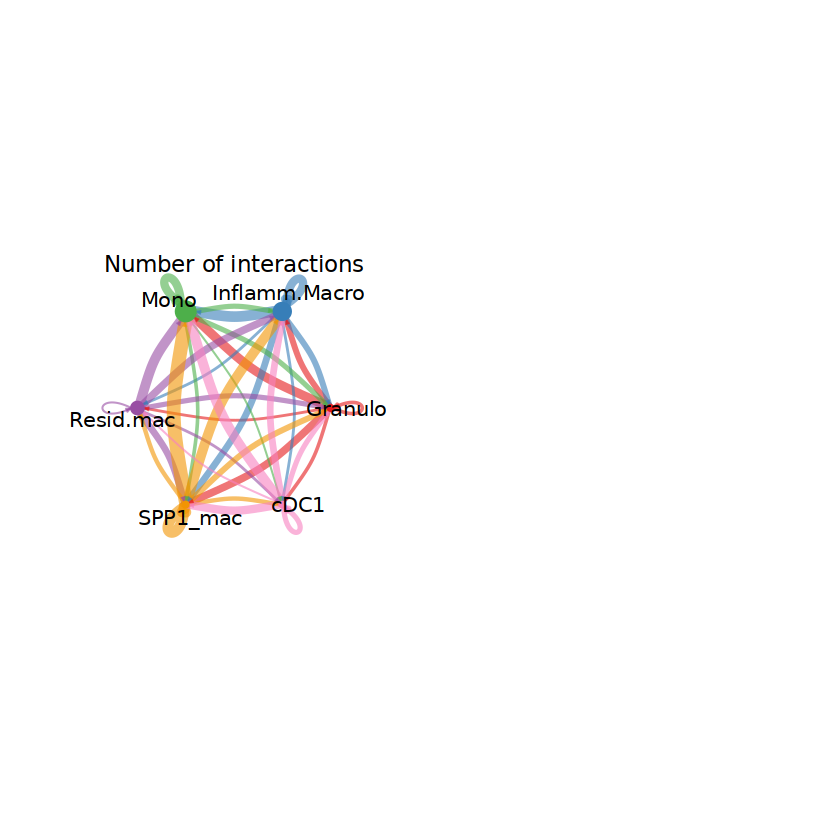

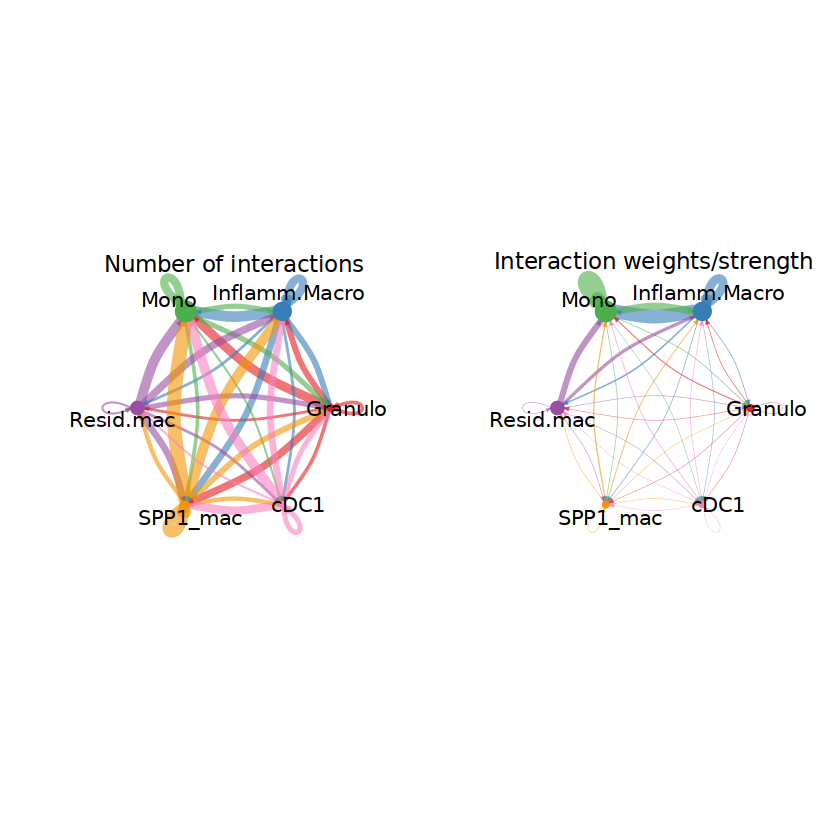

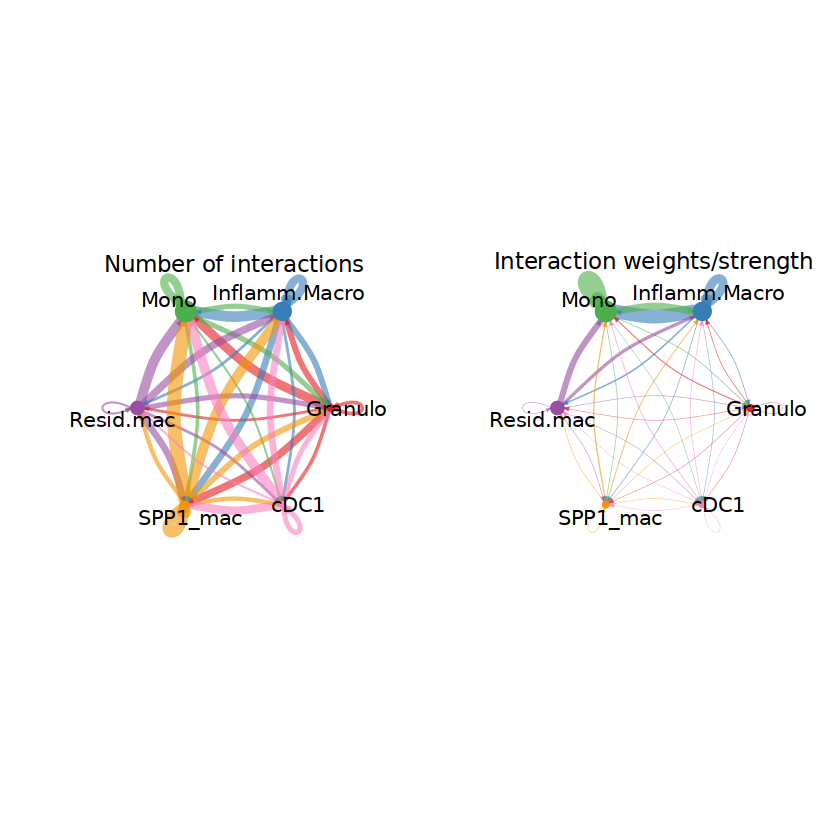

In [40]:
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,2), xpd=TRUE)
netVisual_circle(cellchat@net$count, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
netVisual_circle(cellchat@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")

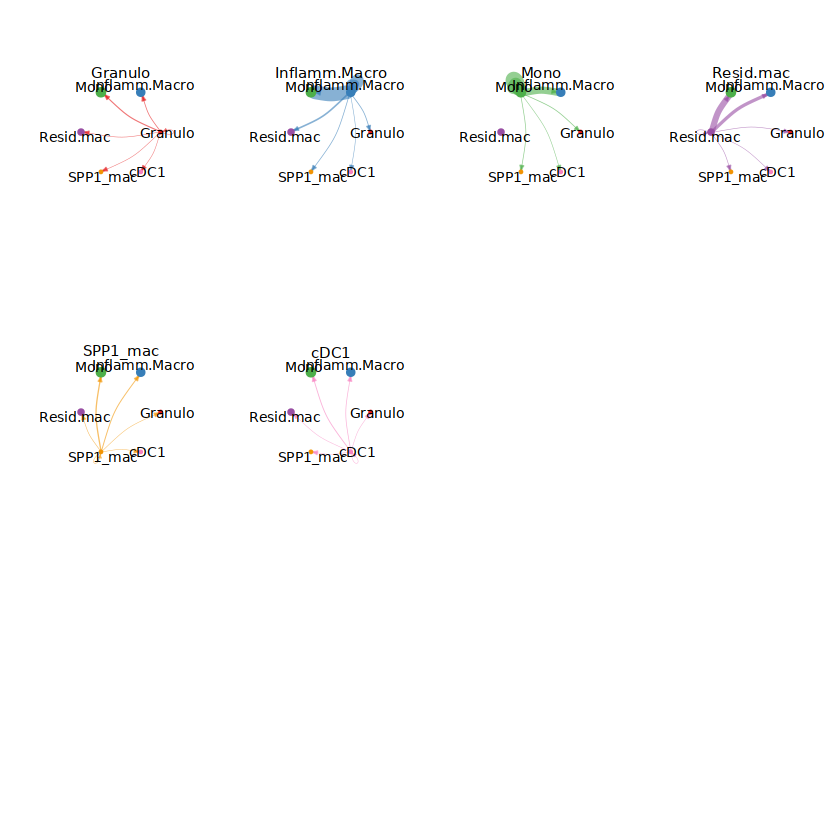

In [41]:
mat <- cellchat@net$weight
par(mfrow = c(3,4), xpd=TRUE)
for (i in 1:nrow(mat)) {
  mat2 <- matrix(0, nrow = nrow(mat), ncol = ncol(mat), dimnames = dimnames(mat))
  mat2[i, ] <- mat[i, ]
  netVisual_circle(mat2, vertex.weight = groupSize, weight.scale = T, edge.weight.max = max(mat), title.name = rownames(mat)[i])
}

In [42]:
pathways.show = cellchat@netP$pathways

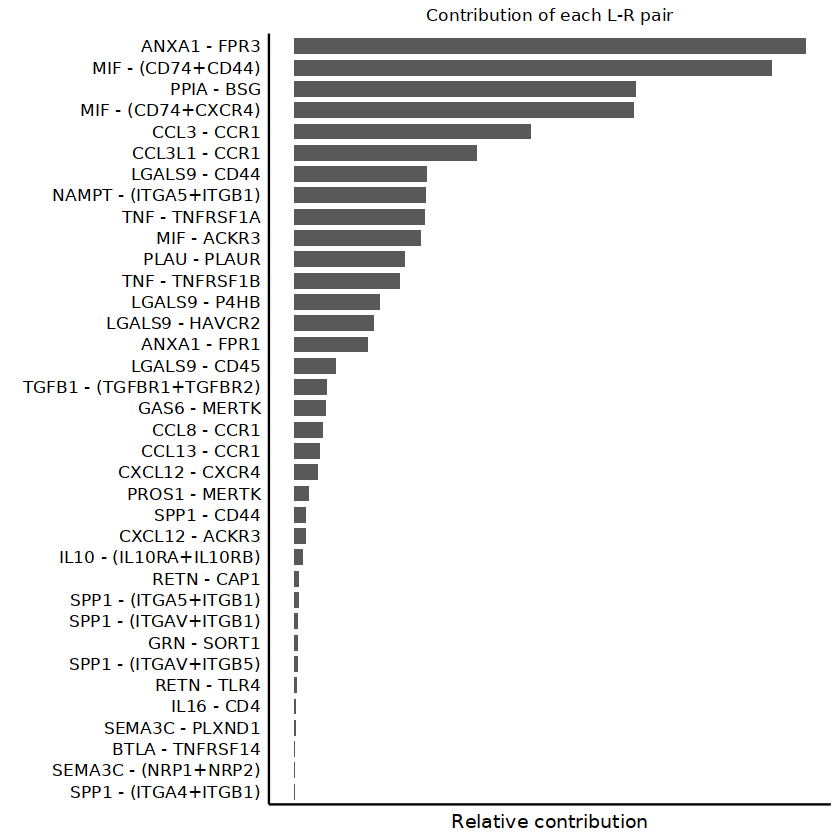

In [43]:
netAnalysis_contribution(cellchat, signaling = pathways.show)

In [44]:
pathways.show

[1] "MIF"      "ANNEXIN"  "CCL"      "CypA"     "GALECTIN" "TNF"     
 [7] "VISFATIN" "PLAU"     "CXCL"     "TGFb"     "GAS"      "SPP1"    
[13] "PROS"     "IL10"     "RESISTIN" "GRN"      "IL16"     "SEMA3"   
[19] "BTLA"

Do heatmap based on a single object 




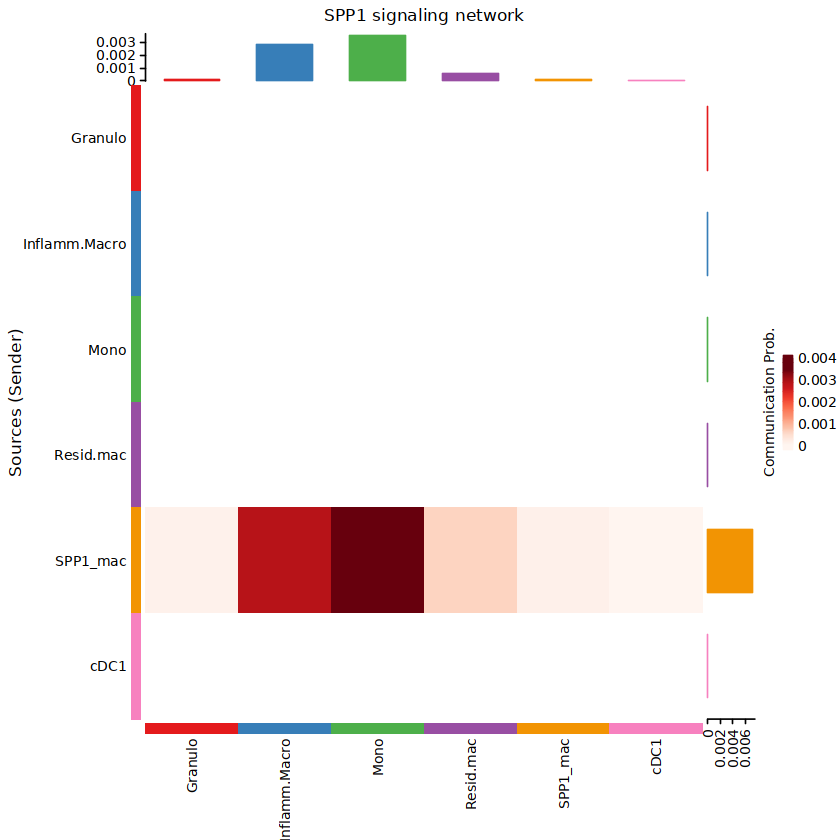

In [48]:
par(mfrow=c(1,1))
netVisual_heatmap(cellchat, signaling = 'SPP1', color.heatmap = "Reds")

In [49]:
ggsave(file = '../figure/fig.macro.spp1_M1.heatmap.pdf',width = 6,height = 5)

Comparing communications on a single object 




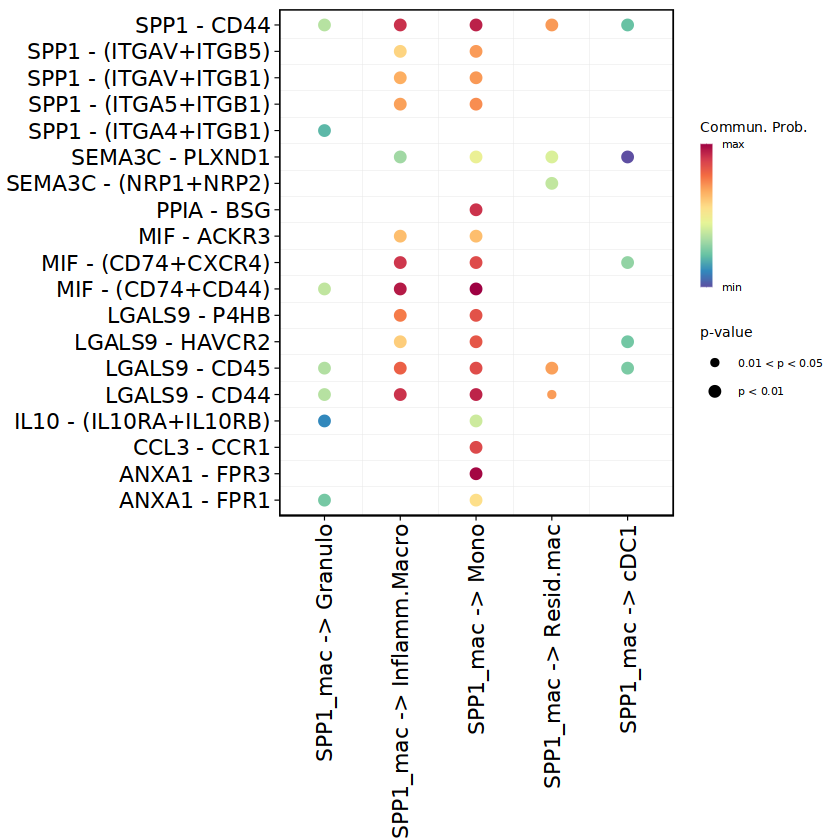

In [46]:
netVisual_bubble(cellchat, sources.use = 5,font.size = 16, targets.use = c(1:4,6), remove.isolate = FALSE)

In [50]:
ggsave(file = '../figure/fig.macro.spp1_M1.dot.pdf',width = 6,height = 5)